# VAE - different clipping parameter 0.3 - 0.75

In [3]:
import numpy as np
import os
import tensorflow as tf
import json
import matplotlib.pyplot as plt

In [23]:
from pathlib import Path
path = str(Path(os.getcwd()).parent)

import sys
sys.path.insert(0,path)

from breakout.vae.vae import ConvVAE

In [24]:
path = '/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200518/tf_vae'

In [25]:
vaelist = os.listdir(path)
vaelist.sort()
len(vaelist)

5

In [26]:
random_vec_for_generation1 = np.random.standard_normal(size=(1,64))
random_vec_for_generation2 = np.random.standard_normal(size=(1,64))
random_vec_for_generation3 = np.random.standard_normal(size=(1,64))
random_vec_for_generation4 = np.random.standard_normal(size=(1,64))

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.


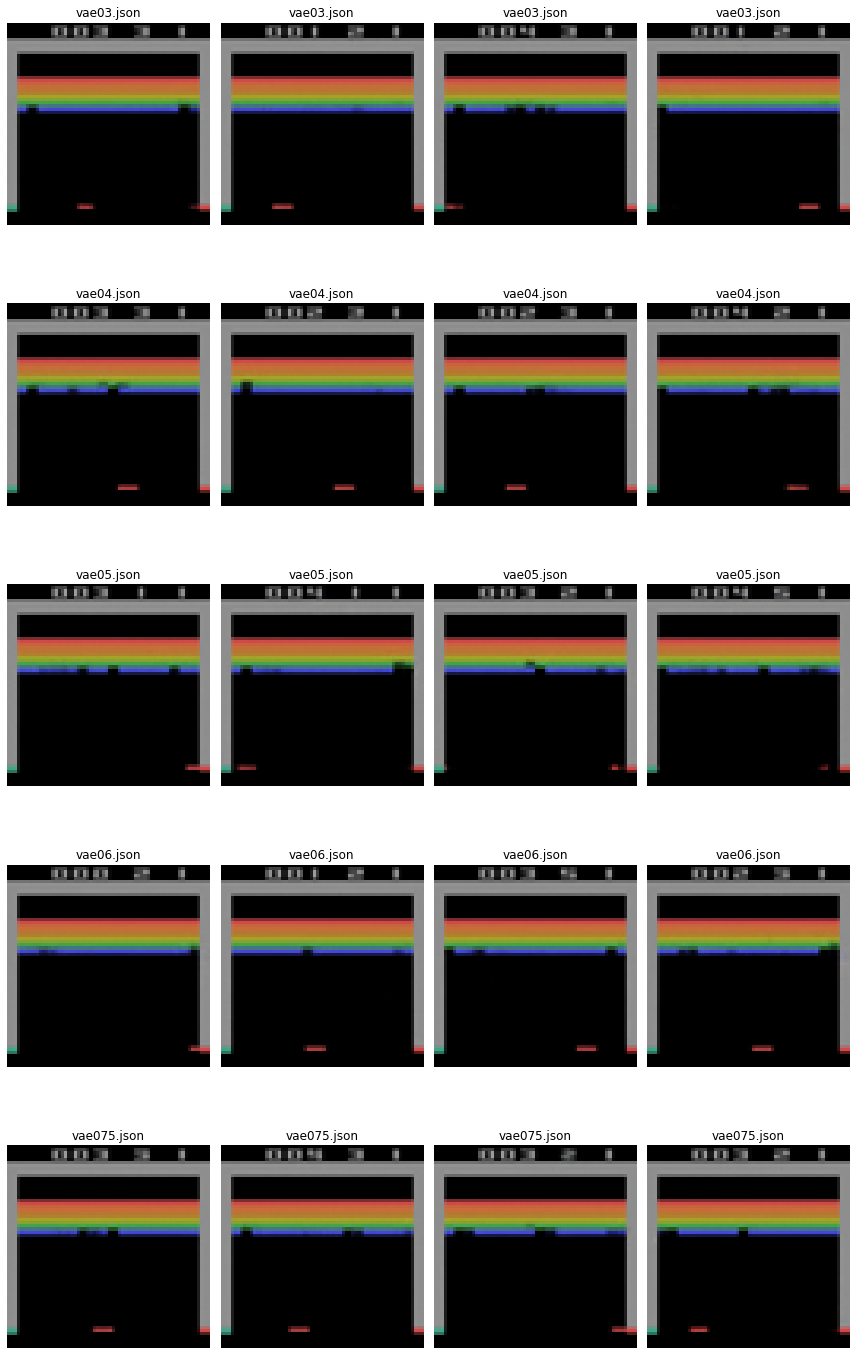

In [29]:
fig = plt.figure(figsize=(12,20))
counter = 1
kl_tolerance = [0.3,0.4,0.5,0.6,0.75]
for vmodel in range(len(vaelist)):
    vae = ConvVAE(z_size=64,
              batch_size=1,
              learning_rate=0.0001,
              kl_tolerance=kl_tolerance[vmodel],
              is_training=False,
              reuse=False,
              gpu_mode=True)
    vae.load_json(path + '/' + vaelist[vmodel])
    for i in range(4):
        if i==0:
            z_dec = vae.decode(random_vec_for_generation1)
        elif i==1:
            z_dec = vae.decode(random_vec_for_generation2)
        elif i==2:
            z_dec = vae.decode(random_vec_for_generation3)
        elif i==3:
            z_dec = vae.decode(random_vec_for_generation4)
        plt.subplot(5,4,counter)
        plt.imshow(z_dec.reshape(64,64,3))
        plt.title(vaelist[vmodel])
        plt.axis('off')
        counter+=1
plt.tight_layout()
plt.show()

In [13]:
recordpath = '/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200423/record_noframeskip/'
recordlist = os.listdir(recordpath)[:10]

In [14]:
data = np.load(recordpath + recordlist[0])['obs']

In [15]:
data.shape

(1000, 64, 64, 3)

In [35]:
obs1 = data[100]
obs2 = data[200]
obs3 = data[300]
obs4 = data[400]
obs = [obs1,obs2,obs3,obs4]

In [41]:
for i in range(len(obs)):
    obs[i] = (obs[i]*255.).astype(np.int)

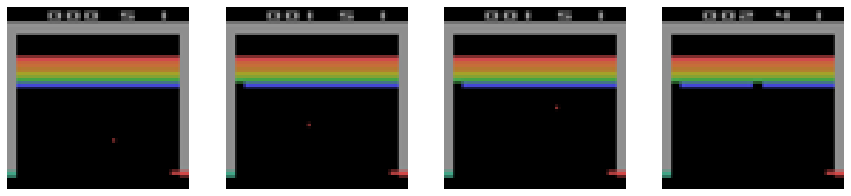

In [49]:
fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(obs[i])
    plt.axis('off')
plt.show()

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.


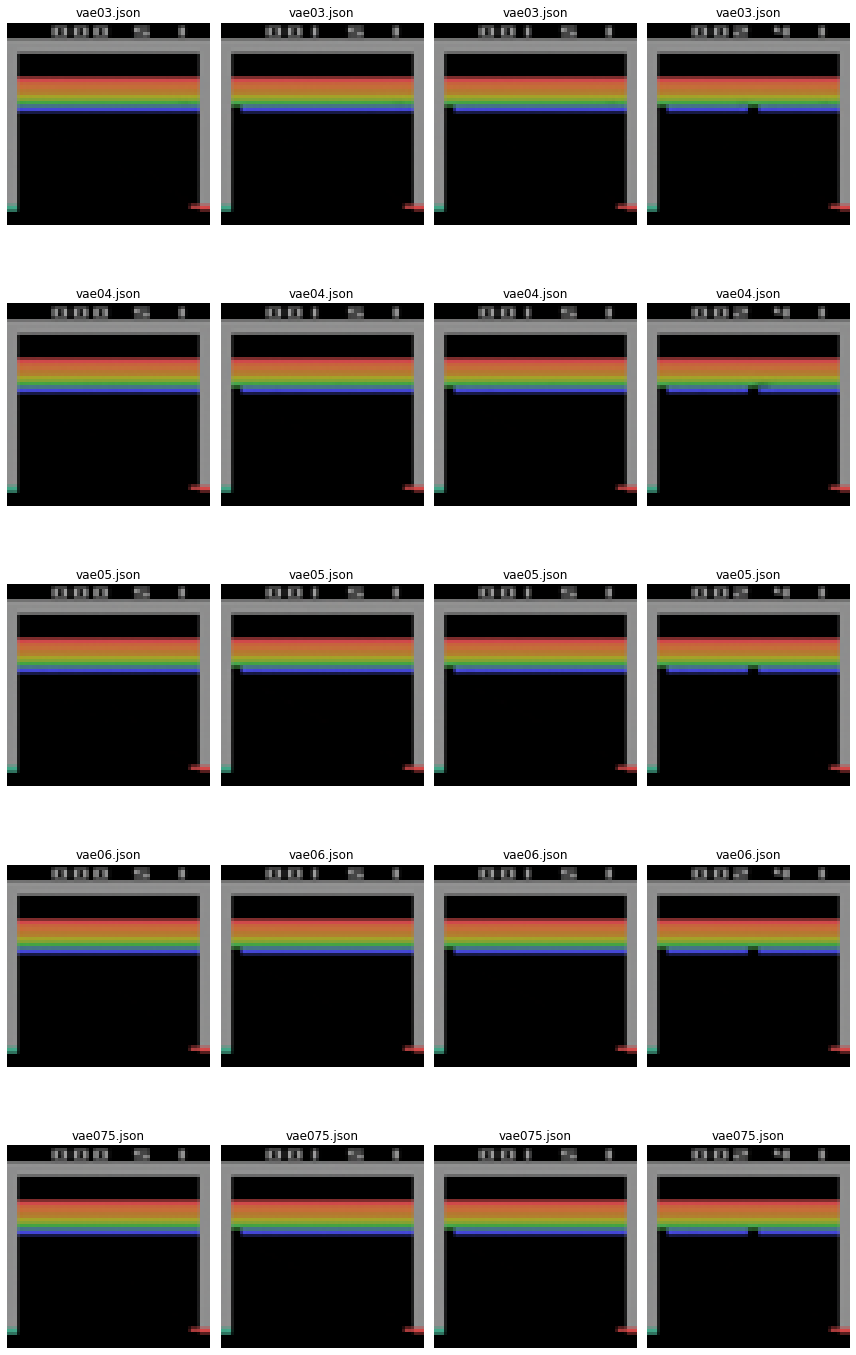

In [53]:
obs = [obs1,obs2,obs3,obs4]
fig = plt.figure(figsize=(12,20))
counter = 1
kl_tolerance = [0.3,0.4,0.5,0.6,0.75]
for vmodel in range(len(vaelist)): 
    vae = ConvVAE(z_size=64,
              batch_size=1,
              learning_rate=0.0001,
              kl_tolerance=kl_tolerance[vmodel],
              is_training=False,
              reuse=False,
              gpu_mode=True)
    vae.load_json(path + '/' + vaelist[vmodel])
    for i in range(4):
        if i==0:
            z_dec = vae.decode(vae.encode(obs[0].reshape(1,64,64,3)))
        elif i==1:
            z_dec = vae.decode(vae.encode(obs[1].reshape(1,64,64,3)))
        elif i==2:
            z_dec = vae.decode(vae.encode(obs[2].reshape(1,64,64,3)))
        elif i==3:
            z_dec = vae.decode(vae.encode(obs[3].reshape(1,64,64,3)))
        plt.subplot(5,4,counter)
        plt.imshow(z_dec.reshape(64,64,3))
        plt.axis('off')
        plt.title(vaelist[vmodel])
        counter+=1
plt.tight_layout()
plt.show()